In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import os
import pynance as pn

# Load other functions
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../scripts'))

from load_datasource import CSVData, get_stock_path
from StockPrice_EDA import Stock_EDA
from quantitative_analysis import StockAnalysis


### Load Stoke Price data for Analysis

In [2]:

# Load AAPL data
AAPL = get_stock_path("AAPL")
AAPL_data = CSVData(AAPL).load_data()

# Load AMZN data
AMZN = get_stock_path("AMZN")
AMZN_data = CSVData(AMZN).load_data()

# Load GOOG data
GOOG = get_stock_path("GOOG")
GOOG_data = CSVData(GOOG).load_data()


In [3]:
# Add Identifiers column for distinction
AAPL_data['Identifier'] = 'AAPL'
AMZN_data['Identifier'] = 'AMZN'
GOOG_data['Identifier'] = 'GOOG'

In [4]:
AAPL_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Identifier
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL


In [5]:
# Concatenate datasets
df_all = pd.concat([AAPL_data, AMZN_data, GOOG_data], ignore_index=True)

In [6]:
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.sort_values('Date')

### Basic Info & Cleaning

In [18]:
df_all.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Identifier
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL


In [6]:
df_all.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
Identifier      0
dtype: int64

In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22864 entries, 0 to 22863
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          22864 non-null  datetime64[ns]
 1   Open          22864 non-null  float64       
 2   High          22864 non-null  float64       
 3   Low           22864 non-null  float64       
 4   Close         22864 non-null  float64       
 5   Adj Close     22864 non-null  float64       
 6   Volume        22864 non-null  int64         
 7   Dividends     22864 non-null  float64       
 8   Stock Splits  22864 non-null  float64       
 9   Identifier    22864 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 1.9+ MB


In [21]:
df_all['Identifier'].value_counts()

Identifier
AAPL    10998
AMZN     6846
GOOG     5020
Name: count, dtype: int64

In [15]:
df1 = df_all.copy()

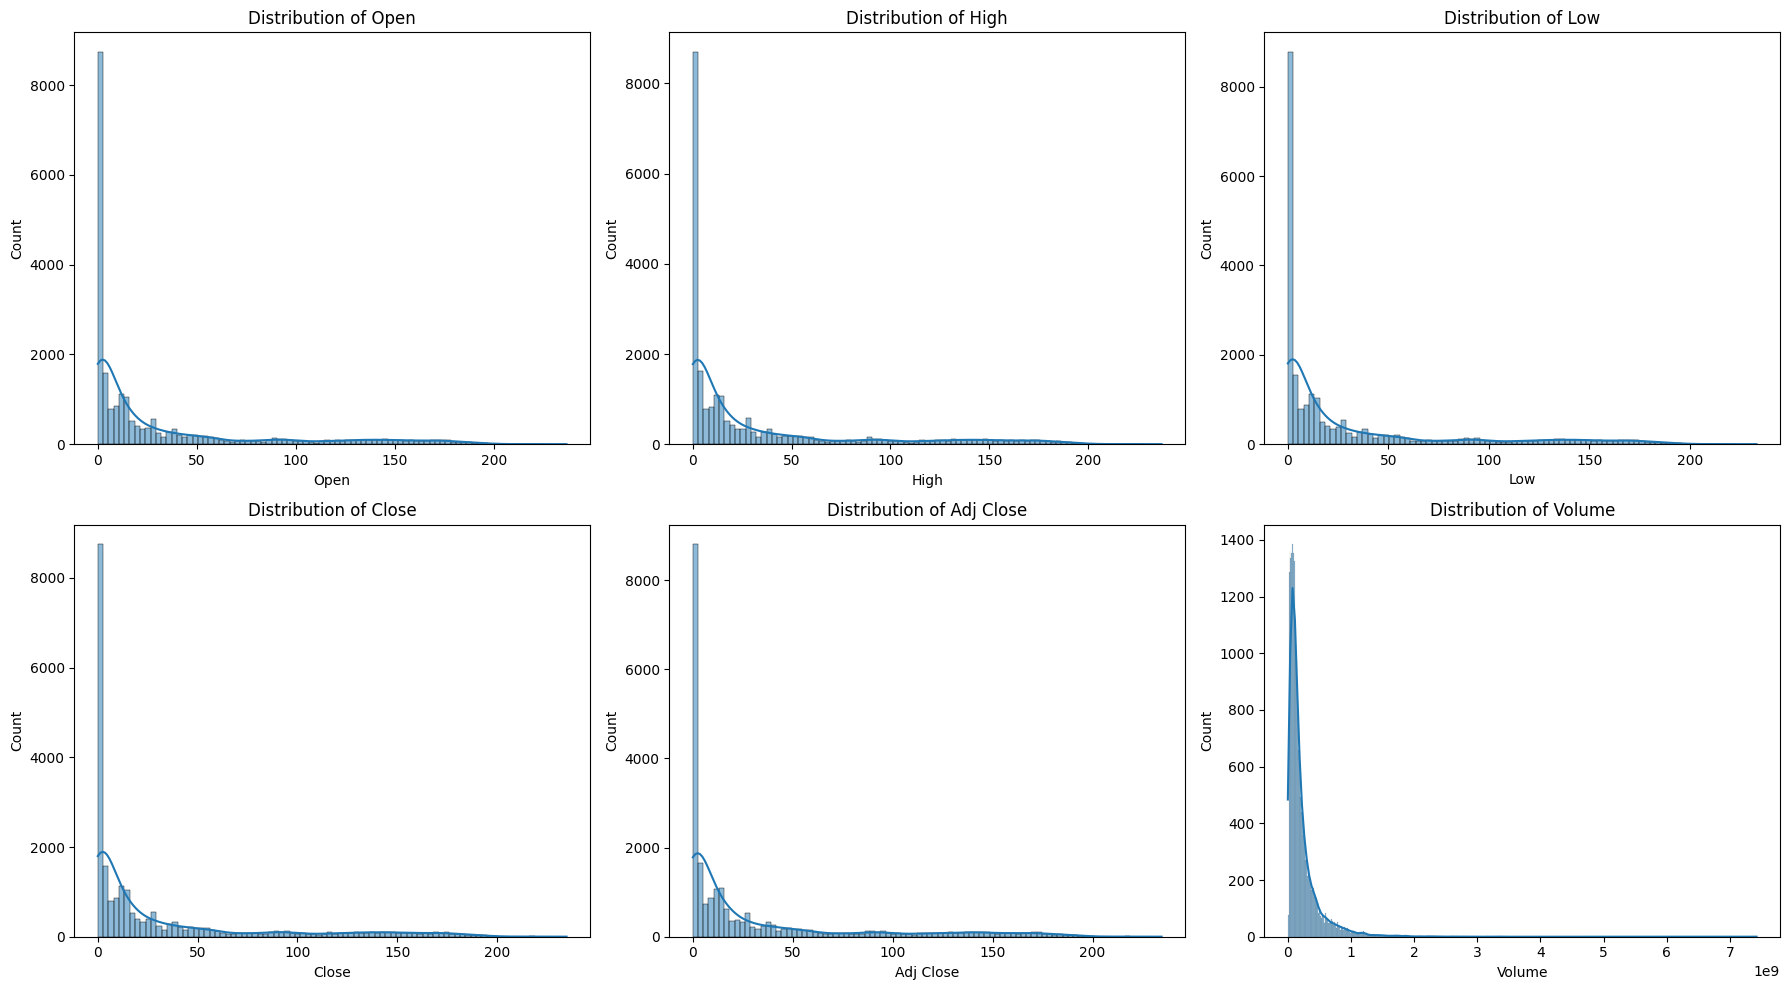

In [16]:
eda = Stock_EDA(df1)
eda.plot_distribution()

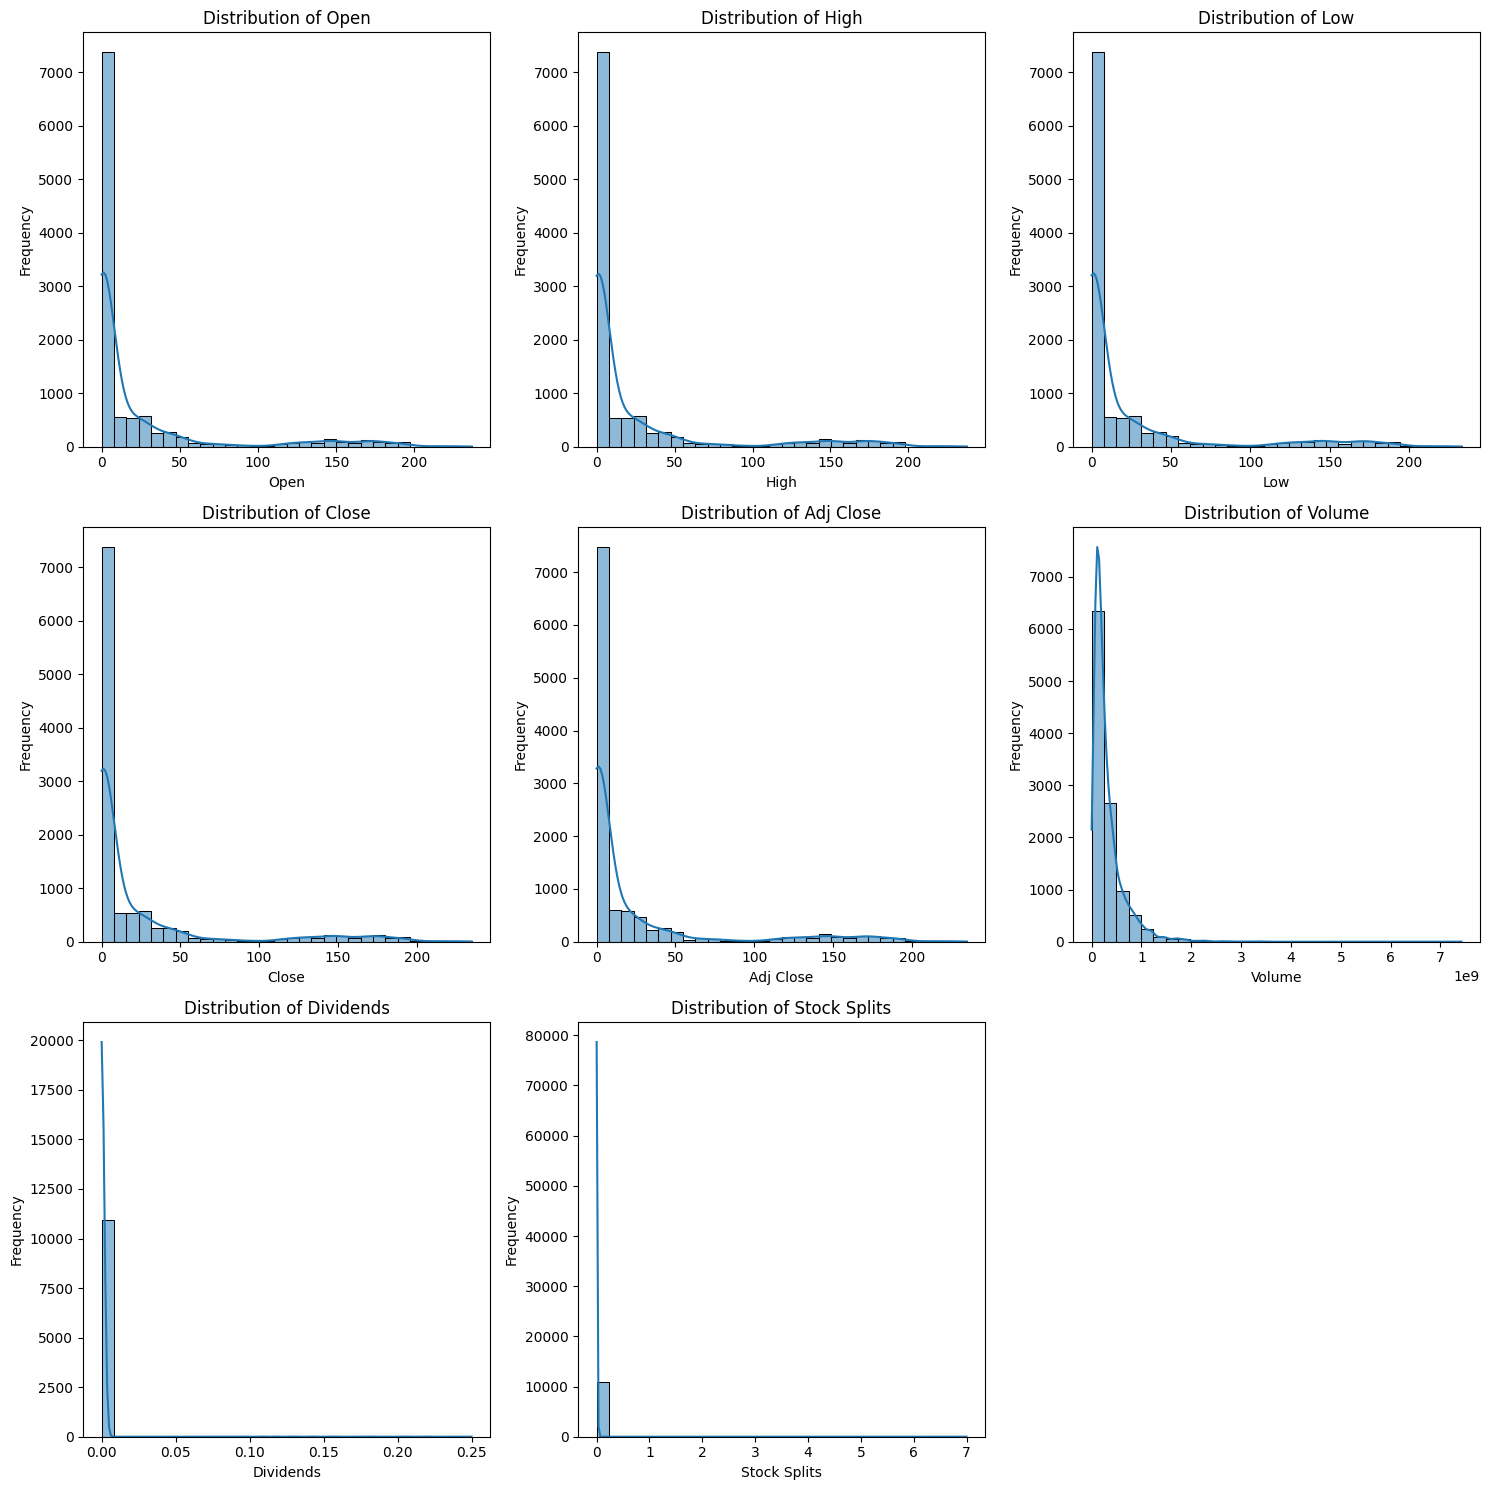

In [ ]:
eda.univariate_num()

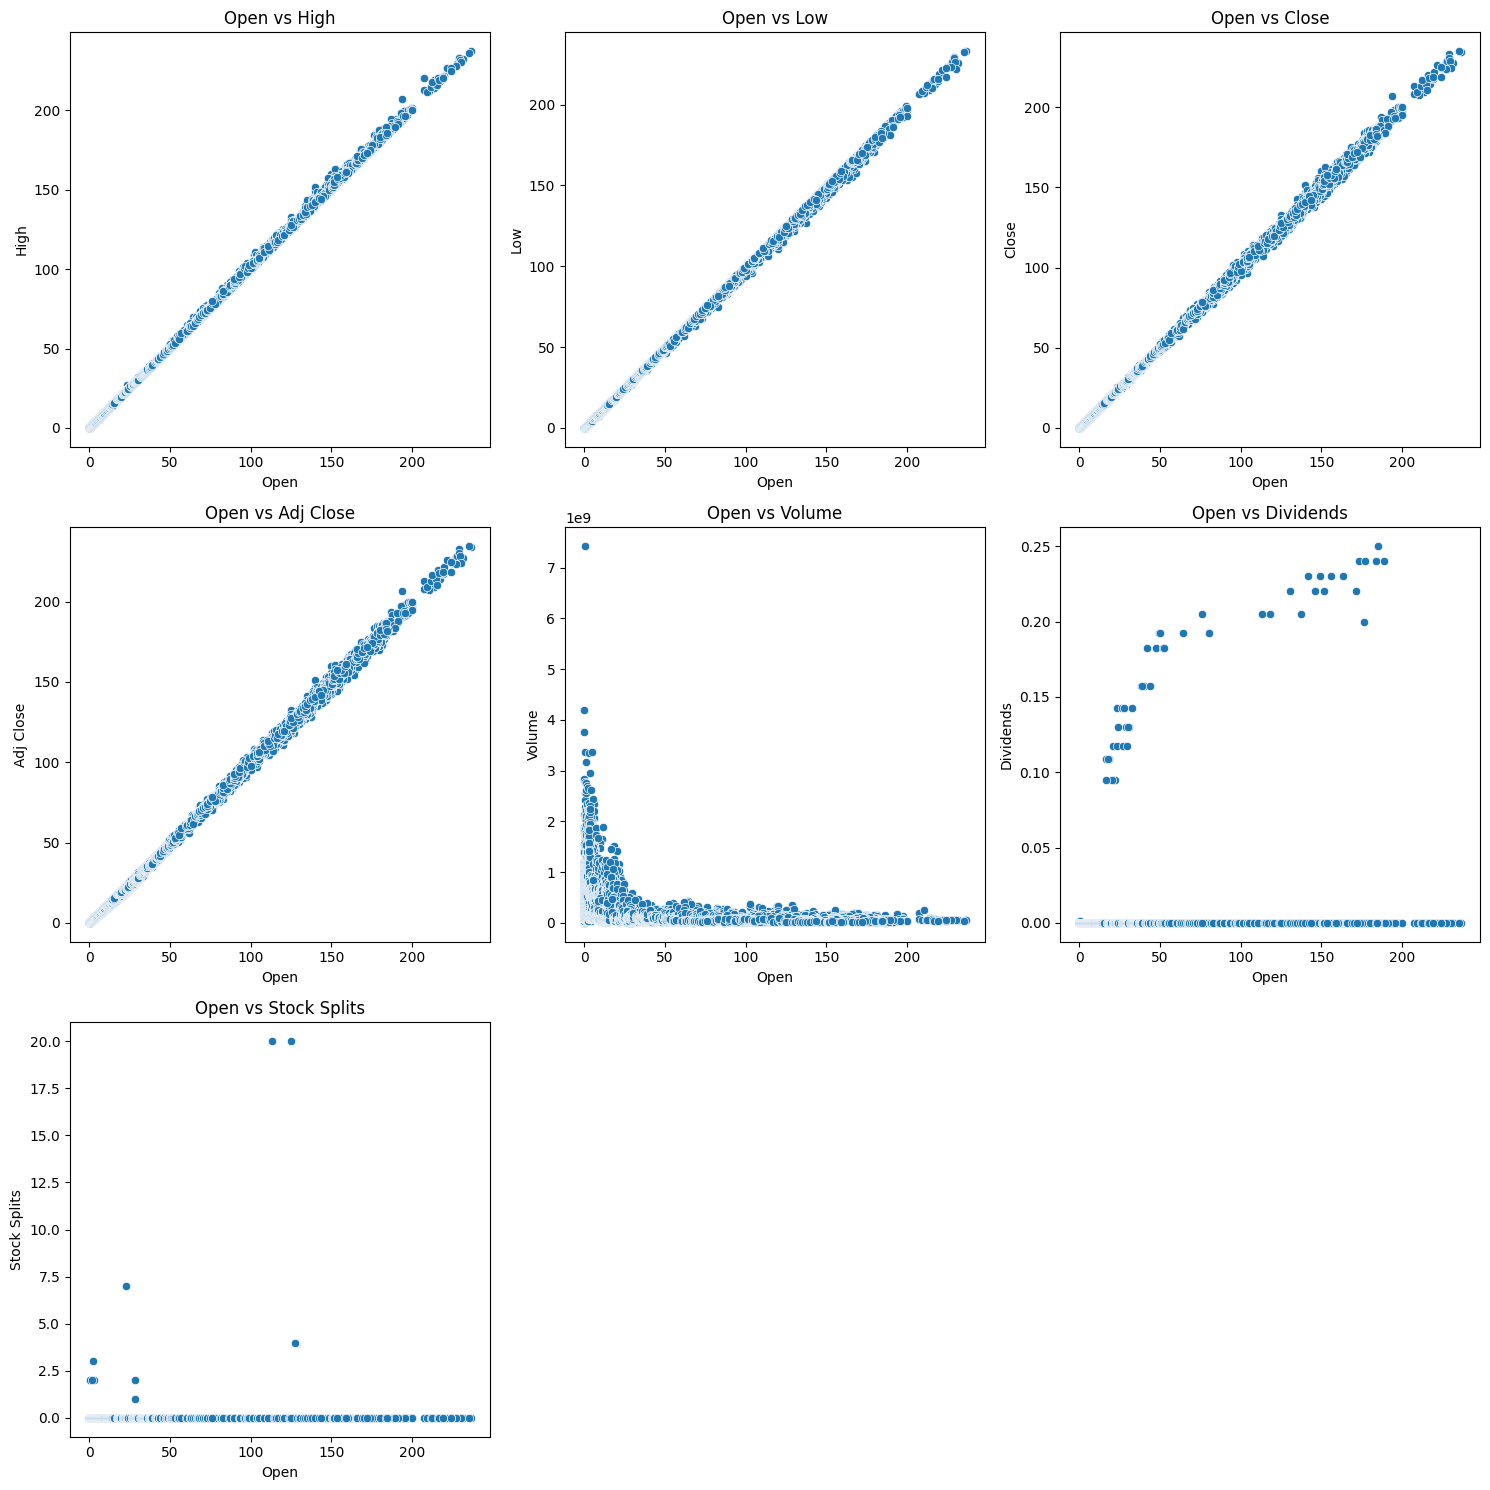

In [ ]:
eda.bivariate_num()

## Quantitative Analysis

In [8]:
df1['Open'] = df1['Open'].astype(float)
df1['High'] = df1['High'].astype(float)
df1['Low'] = df1['Low'].astype(float)
df1['Close'] = df1['Close'].astype(float)
df1['Volume'] = df1['Volume'].astype(float)

In [9]:
quantit = StockAnalysis(df1)
quantit.calculate_indicators()

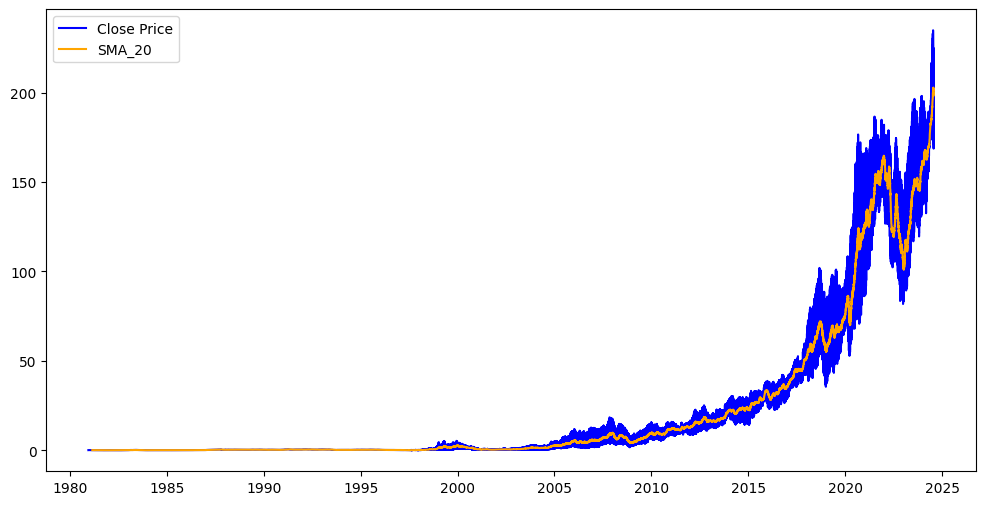

In [10]:
quantit.visualize_SMA()

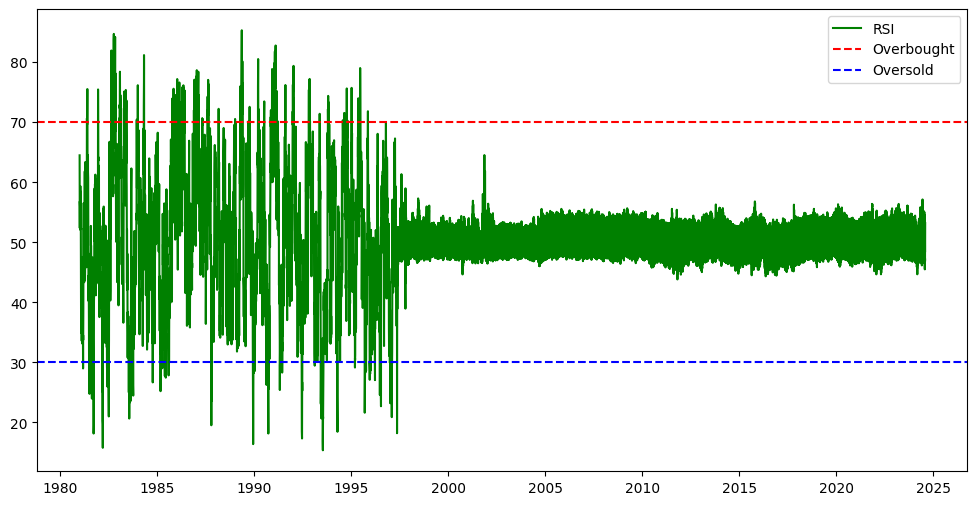

In [17]:
quantit.visualize_RSI()

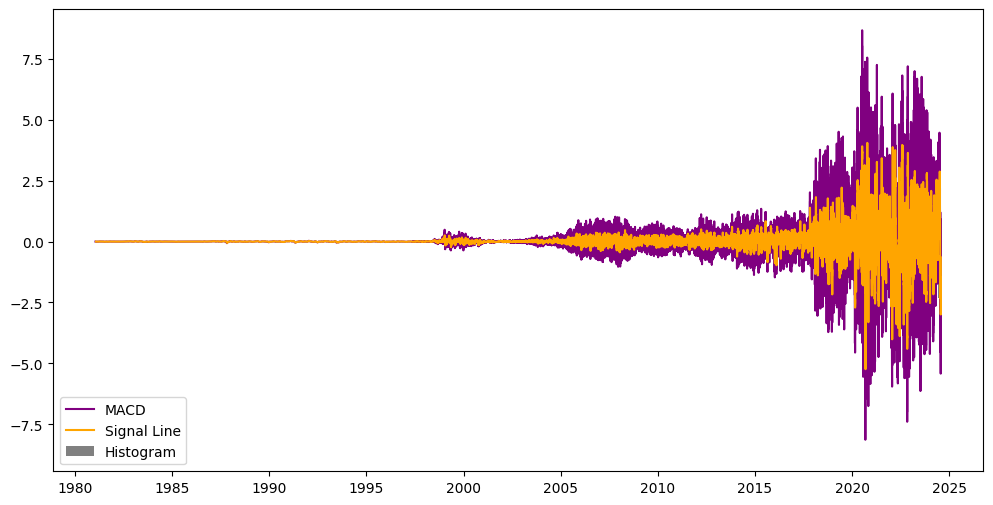

In [18]:
quantit.visualize_MACD()

### ○	Use PyNance for Financial Metrics

In [12]:
quantit.calculate_daily_returns()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Identifier,SMA_20,RSI,MACD,MACD_signal,MACD_hist,Daily_Return
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600.0,0.0,0.0,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800.0,0.0,0.0,AAPL,NaN,NaN,NaN,NaN,NaN,-5.217061
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000.0,0.0,0.0,AAPL,NaN,NaN,NaN,NaN,NaN,-7.339788
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600.0,0.0,0.0,AAPL,NaN,NaN,NaN,NaN,NaN,2.475091
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600.0,0.0,0.0,AAPL,NaN,NaN,NaN,NaN,NaN,2.899246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800.0,0.0,0.0,AAPL,199.985400,53.285235,0.002855,-2.686731,2.689586,19.126643
22862,2024-07-29,170.500000,172.160004,169.720001,171.130005,171.130005,13768900.0,0.0,0.0,GOOG,198.881201,46.830243,-2.088730,-2.676068,0.587338,-21.586327
17843,2024-07-30,184.720001,185.860001,179.380005,181.710007,181.710007,39508600.0,0.0,0.0,AMZN,198.676201,48.343698,-2.540270,-2.506905,-0.033365,6.182435
10997,2024-07-30,219.190002,220.330002,216.119995,218.800003,218.547043,41643800.0,0.0,0.0,AAPL,199.052201,53.356198,0.136149,-2.378262,2.514411,20.411642


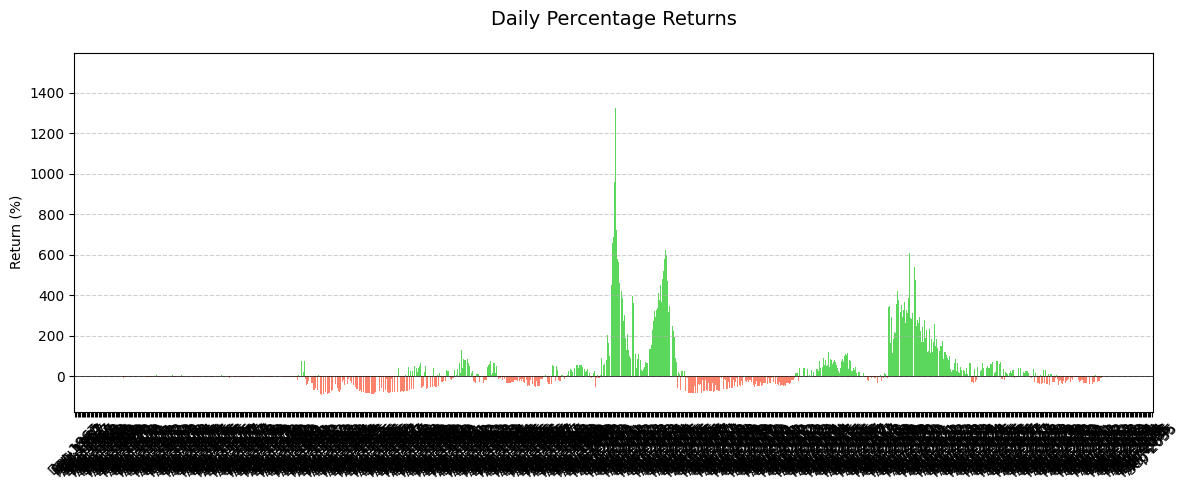

In [13]:
quantit.plot_daily_returns()

In [10]:
quantit.calculate_cumulative_returns()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Identifier,SMA_20,RSI,MACD,MACD_signal,MACD_hist,Cumulative_Return
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600.0,0.0,0.0,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800.0,0.0,0.0,AAPL,NaN,NaN,NaN,NaN,NaN,-0.052171
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000.0,0.0,0.0,AAPL,NaN,NaN,NaN,NaN,NaN,-0.121739
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600.0,0.0,0.0,AAPL,NaN,NaN,NaN,NaN,NaN,-0.100002
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600.0,0.0,0.0,AAPL,NaN,NaN,NaN,NaN,NaN,-0.073908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800.0,0.0,0.0,AAPL,199.985400,53.285235,0.002855,-2.686731,2.689586,1699.377237
22862,2024-07-29,170.500000,172.160004,169.720001,171.130005,171.130005,13768900.0,0.0,0.0,GOOG,198.881201,46.830243,-2.088730,-2.676068,0.587338,1332.328251
17843,2024-07-30,184.720001,185.860001,179.380005,181.710007,181.710007,39508600.0,0.0,0.0,AMZN,198.676201,48.343698,-2.540270,-2.506905,-0.033365,1414.760407
10997,2024-07-30,219.190002,220.330002,216.119995,218.800003,218.547043,41643800.0,0.0,0.0,AAPL,199.052201,53.356198,0.136149,-2.378262,2.514411,1703.740356


In [11]:
quantit._ensure_datetime_index()

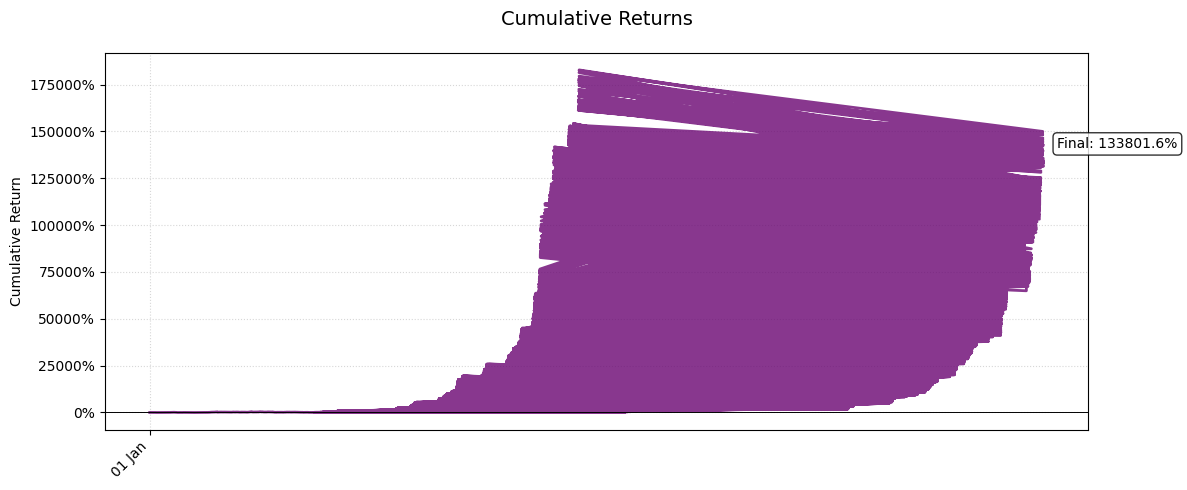

In [14]:
quantit.plot_cumulative_returns()

In [14]:
quantit.annualized_volatility()

np.float64(1778.4045252701394)

In [ ]:
quantit.sharpe_ratio()

np.float64(3.57864606867889)

In [ ]:
quantit.max_drawdown()

np.float64(-95.60799532180003)

In [ ]:
#benchmark_returns = pd.Series(np.random.normal(0.0005, 0.01, len(df1)), index=df1.index)
#quantit.beta(benchmark_returns)